In [531]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learning imports
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing and cleaning up training data

In [532]:
# Reading the train data into dataframe
train_df = pd.read_csv('./codetest_train.txt',delimiter='\t')

In [533]:
# viewing dataframe
# some of the columns are strings so need to find them
train_df.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,NaN,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


In [534]:
# Dataframe information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 255 entries, target to f_253
dtypes: float64(251), object(4)
memory usage: 9.8+ MB


In [535]:
# Basic stats on training data indicates that most features are missing around 100 values
# Deleting rows where NaN values exist leaves too few data points to make a robust model
train_df.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,...,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
std,5.259896,0.999739,0.997930,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.988310,...,1.001453,0.997330,0.996458,1.005000,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.673000,-0.685000,-0.651000,-0.655000,-0.685500,-0.660000,-0.672000,-0.679000,-0.662000,...,-0.665750,-0.676000,-0.661750,-0.692000,-0.663000,-0.647750,-0.679500,-0.647000,-0.695000,-0.677000
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.677000,0.674500,0.719000,0.668000,0.654000,0.649000,0.679000,0.670250,0.698000,...,0.671750,0.670000,0.702500,0.655000,0.651000,0.709750,0.660250,0.692000,0.672250,0.705250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


In [536]:
# NaN values are filled with median of each column. Median is used as is less prone to outlier effects than mean
train_df = train_df.fillna(train_df.median())

In [537]:
train_df.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.143878,-0.000638,0.002484,0.029220,-0.005277,-0.006764,0.005331,0.001443,-0.001412,0.009899,...,0.013753,0.004170,0.023325,-0.018798,-0.009855,0.016628,-0.004648,0.016918,-0.001277,0.010424
std,5.259896,0.989993,0.990717,1.009916,0.981396,0.996888,0.986997,0.994221,0.987737,0.977676,...,0.992399,0.985602,0.987850,0.994290,0.979483,0.999735,0.981611,0.993415,0.993730,0.997181
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.660250,-0.673250,-0.633000,-0.640000,-0.670000,-0.646000,-0.650000,-0.666000,-0.648500,...,-0.649000,-0.653250,-0.652000,-0.672000,-0.648000,-0.628250,-0.662000,-0.637000,-0.679250,-0.662750
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.662250,0.664250,0.702250,0.654250,0.636250,0.637250,0.657250,0.653250,0.683000,...,0.661000,0.653000,0.687500,0.636000,0.632000,0.694250,0.643750,0.676250,0.661250,0.689250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


In [538]:
# Some of the columns are non-floats so excluded them. There is already 250 variables in this set
# If there was less I might of tried to use the non-floats
train_df= train_df.select_dtypes(exclude=['object'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Columns: 251 entries, target to f_253
dtypes: float64(251)
memory usage: 9.6 MB


In [539]:
train_df.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,-0.008,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,-0.035,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


In [540]:
# seperating data into variables and target arrays
y =train_df.iloc[:,:1].values
X =train_df.iloc[:,1:].values

In [541]:
# Checking the data type and shape of X and y arrays
X.dtype

dtype('float64')

In [542]:
y.dtype

dtype('float64')

In [543]:
X.shape

(5000L, 250L)

In [544]:
y.shape

(5000L, 1L)

# Importing and cleaning up of test data

In [545]:
# Reading the test data into dataframe
test_df = pd.read_csv('./codetest_test.txt',delimiter='\t')
test_df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,1.122,2.372,-1.303,-0.421,-1.724,0.206,0.449,1.305,-0.344,0.307,...,0.988,-0.472,0.522,-0.308,1.062,-0.839,0.819,0.342,-0.162,-1.123
1,0.645,-0.818,-1.193,0.286,0.946,2.001,-1.491,-0.162,-1.668,0.310,...,-0.020,0.764,-0.623,0.147,0.392,0.509,1.608,-0.321,-1.723,1.223
2,-0.661,0.373,1.160,0.448,NaN,-0.378,-0.645,0.713,1.900,0.627,...,0.156,-0.267,0.140,-0.908,0.093,0.227,-0.996,-0.665,0.444,-1.452
3,0.837,1.270,-1.421,-0.483,1.136,0.051,-0.097,NaN,-1.524,-0.253,...,1.653,1.951,0.657,-1.238,-0.487,-1.341,1.221,1.938,-0.447,0.411
4,-0.001,-0.050,0.442,0.230,0.525,0.326,-0.590,-0.287,-0.556,-0.088,...,-0.291,-0.196,-0.738,-0.377,-0.660,1.776,-1.028,-0.797,0.185,0.378


In [546]:
test_df.describe()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,972.000000,983.000000,983.000000,982.000000,978.000000,984.000000,982.000000,978.000000,980.000000,979.000000,...,973.000000,976.000000,985.000000,979.000000,986.000000,980.000000,981.000000,978.000000,979.000000,985.000000
mean,-0.035218,0.100792,0.021098,0.005391,-0.042323,-0.013639,-0.033501,0.025939,0.029102,0.000221,...,0.022764,-0.071009,0.038268,0.053555,-0.021745,-0.028499,-0.025662,0.003518,-0.007108,-0.017024
std,0.978034,0.989471,1.028476,0.989312,1.016019,1.038796,1.018101,0.971878,0.962718,0.999688,...,0.973855,1.010040,0.981809,1.026265,1.028849,0.941963,1.045912,1.001211,0.998150,1.015624
min,-2.997000,-2.760000,-3.517000,-3.017000,-3.332000,-3.241000,-3.441000,-2.828000,-2.911000,-4.457000,...,-2.801000,-4.186000,-3.156000,-4.145000,-3.400000,-2.860000,-3.364000,-2.959000,-2.985000,-3.491000
25%,-0.679000,-0.575000,-0.654000,-0.671750,-0.706000,-0.730000,-0.752000,-0.666000,-0.569000,-0.715000,...,-0.586000,-0.752750,-0.611000,-0.688500,-0.762500,-0.658500,-0.730000,-0.671250,-0.684500,-0.722000
50%,-0.045500,0.149000,0.033000,0.027000,-0.030500,-0.024500,-0.082500,0.017500,0.007500,-0.035000,...,0.020000,-0.099000,0.050000,0.041000,-0.013000,-0.035000,-0.051000,0.030500,0.010000,-0.009000
75%,0.671500,0.715000,0.697000,0.661750,0.594000,0.730500,0.659000,0.681500,0.716500,0.679000,...,0.653000,0.586750,0.691000,0.726000,0.649000,0.587000,0.717000,0.670250,0.679500,0.655000
max,3.022000,3.188000,3.122000,2.927000,3.462000,2.873000,3.730000,3.176000,2.863000,3.023000,...,3.041000,3.496000,3.019000,3.971000,3.047000,3.351000,3.336000,3.083000,2.727000,3.413000


In [547]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 254 entries, f_0 to f_253
dtypes: float64(250), object(4)
memory usage: 1.9+ MB


In [548]:
test_df= test_df.select_dtypes(exclude=['object'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 250 entries, f_0 to f_253
dtypes: float64(250)
memory usage: 1.9 MB


In [549]:
test_df = test_df.fillna(test_df.median())
test_df.describe()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.035506,0.101612,0.021300,0.005780,-0.042063,-0.013813,-0.034383,0.025753,0.028670,-0.000519,...,0.022689,-0.071681,0.038444,0.053291,-0.021623,-0.028629,-0.026143,0.004112,-0.006749,-0.016904
std,0.964232,0.981036,1.019688,0.980363,1.004771,1.030445,1.008908,0.961118,0.953037,0.989138,...,0.960605,0.997843,0.974411,1.015422,1.021615,0.932487,1.035924,0.990133,0.987606,1.007970
min,-2.997000,-2.760000,-3.517000,-3.017000,-3.332000,-3.241000,-3.441000,-2.828000,-2.911000,-4.457000,...,-2.801000,-4.186000,-3.156000,-4.145000,-3.400000,-2.860000,-3.364000,-2.959000,-2.985000,-3.491000
25%,-0.668250,-0.570000,-0.639500,-0.659500,-0.697500,-0.720250,-0.737000,-0.657250,-0.558750,-0.698500,...,-0.575000,-0.741250,-0.598750,-0.677750,-0.750000,-0.635500,-0.696750,-0.664250,-0.663250,-0.696500
50%,-0.045500,0.149000,0.033000,0.027000,-0.030500,-0.024500,-0.082500,0.017500,0.007500,-0.035000,...,0.020000,-0.099000,0.050000,0.041000,-0.013000,-0.035000,-0.051000,0.030500,0.010000,-0.009000
75%,0.654000,0.695250,0.686500,0.649000,0.573000,0.716000,0.642500,0.653000,0.686000,0.673000,...,0.628250,0.570250,0.683000,0.713000,0.640750,0.570250,0.698500,0.636500,0.658250,0.643250
max,3.022000,3.188000,3.122000,2.927000,3.462000,2.873000,3.730000,3.176000,2.863000,3.023000,...,3.041000,3.496000,3.019000,3.971000,3.047000,3.351000,3.336000,3.083000,2.727000,3.413000


In [550]:
X_testdf = test_df.values
X_testdf.shape

(1000L, 250L)

#  Linear regression on data as is to see if it's a suitable model

In [551]:
# Splitting data into training and validation data sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [552]:
# initialising the model
lin = LinearRegression()

In [553]:
# fitting the training data to the model
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [554]:
# Predicting the target values from the training and validation data sets
y_train_pred = lin.predict(X_train)
y_valid_pred = lin.predict(X_valid)

In [555]:
# Scoring the model using the mean square error
print 'MSE train: %.3f, valid: %.3f' %(
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_valid, y_valid_pred))

MSE train: 12.806, valid: 15.230


In [556]:
# Scoring the model using R^2 value
print 'R^2 train: %.3f, valid: %.3f' %(
r2_score(y_train, y_train_pred),
r2_score(y_valid, y_valid_pred))

R^2 train: 0.527, valid: 0.483


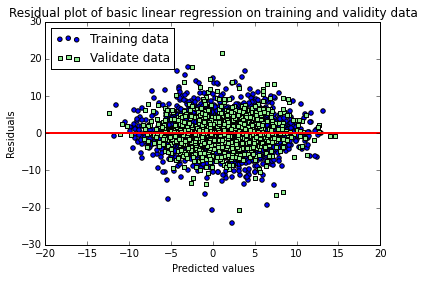

In [557]:
# Since this is a high dimensional model, we can’t visualise the date on  a 2D/3D scatter plot
# We can visualise the residuals of the model to see if linear regression is appropriate

plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_valid_pred,  y_valid_pred - y_valid, c='lightgreen', marker='s', label='Validate data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=20, lw=2, color='red')
plt.xlim([-20,20])
plt.title('Residual plot of basic linear regression on training and validity data')

The residuals are distributed around the zero line and there are no obvious patterns in the plot. This indicates that linear regression captures all the necessary information to model the data. Also, the train and validation datasets return similar scores indicating that overfitting isn’t a problem.



Linear regression appears to be the best method to describe and predict the data but the above results has a high mean square and low R^2 scores.  Ideally These scores should be better so in the next part I will try clean up the data by removing outliers that can distort the model.  Linear regression is particularly susceptible to the effects of outliers.

# Dealing with outliers to try and improve linear model preformence

I used the RANSAC algorithm to remove outliers in the data to improve model performance. More information about it can be found at: https://en.wikipedia.org/wiki/RANSAC 

In [558]:
y =train_df.iloc[:,:1].values
X =train_df.iloc[:,1:].values

In [559]:
# implementing the RANSAC algorithm on the training data
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=1500,
                        residual_metric = lambda x: np.sum(np.abs(x),axis=1),
                        residual_threshold = 5.0,
                        random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=1500, random_state=0,
        residual_metric=<function <lambda> at 0x00000000593D1278>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [560]:
# counter that tell us how many outliers RANSAC found
inlier_mask = ransac.inlier_mask_

outlier_amt = 0
for i in inlier_mask:
    if i == False:
        outlier_amt += 1
        
print 'The amount of outliers from this threshold is %.0f out of %.0f' % (outlier_amt,len(X))

The amount of outliers from this threshold is 777 out of 5000


We have held onto 85% of the original data, this is more than enough to make a good model

# Fitting cleaned up data to linear regression

In [561]:
# Taking the inliers RANSAC
X = X[inlier_mask]

In [562]:
y = y[inlier_mask]

In [563]:
# Splitting data up into training and validation datasets, fitting it to model and predicting target values
X_train, X_valid, y_train, y_valid = train_test_split(X,y)
lin = LinearRegression()
lin.fit(X_train,y_train)
y_train_pred = lin.predict(X_train)
y_valid_pred = lin.predict(X_valid)


In [564]:
# Scoring the MSE of the data
print 'R^2 train: %.3f, valid: %.3f' %(
r2_score(y_train, y_train_pred),
r2_score(y_valid, y_valid_pred))

R^2 train: 0.737, valid: 0.722


In [565]:
# Scoring R^2 of the data
print 'MSE train: %.3f, valid: %.3f' %(
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_valid, y_valid_pred))

MSE train: 5.002, valid: 5.718


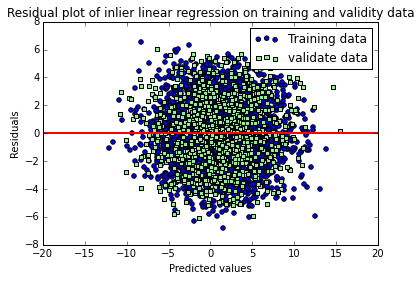

In [566]:
# Residual plot of the model
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_valid_pred,  y_valid_pred - y_valid, c='lightgreen', marker='s', label='validate data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='best')
plt.hlines(y=0, xmin=-20, xmax=20, lw=2, color='red')
plt.xlim([-20,20])
plt.title('Residual plot of inlier linear regression on training and validity data')

Removing outliers has improved the MSE and R^2 of the model, this means that the model can more accurately predict new data.  There is little difference between the train and valid predictions indicating that overfitting isn't a problem here

# Random forest regression

It is always a good idea to try other models as comparison/sanity check. Here, I used Random forest regression on the training data.

In [567]:
y =train_df.iloc[:,:1].values
X =train_df.iloc[:,1:].values
X_train, X_valid, y_train, y_valid = train_test_split(X,y,
                                                     test_size=0.4,
                                                     random_state=1)
forest = RandomForestRegressor(n_estimators=10,
                              criterion='mse',
                              random_state=1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
y_train_pred_forest = forest.predict(X_train)
y_valid_pred_forest = forest.predict(X_valid)
print 'R^2 train: %.3f, valid: %.3f' %(
r2_score(y_train, y_train_pred_forest),
r2_score(y_valid, y_valid_pred_forest))
print '\n'
print 'MSE train: %.3f, valid: %.3f' %(
mean_squared_error(y_train, y_train_pred_forest),
mean_squared_error(y_valid, y_valid_pred_forest))

R^2 train: 0.886, valid: 0.419


MSE train: 3.159, valid: 16.069


C:\Users\tcd\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The large difference between the train and valid data indicates that the model overfits the training data. Therefore, this is a poor model for predicting new values and won’t be used on the test data.

# Fitting model to provided test data

The model I choose to use for predicting the test values is linear regression with outliers removed since it scores well and overfitting isn't a problem.

In [568]:
y =train_df.iloc[:,:1].values
X =train_df.iloc[:,1:].values

In [569]:
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=1500,
                        residual_metric = lambda x: np.sum(np.abs(x),axis=1),
                        residual_threshold = 5.0,
                        random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, max_trials=100,
        min_samples=1500, random_state=0,
        residual_metric=<function <lambda> at 0x000000005ECE7748>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [570]:
inlier_mask = ransac.inlier_mask_

outlier_amt = 0
for i in inlier_mask:
    if i == False:
        outlier_amt += 1
        
print 'The amount of outliers from this threshold is %.0f out of %.0f' % (outlier_amt,len(X))

The amount of outliers from this threshold is 777 out of 5000


In [571]:
X = X[inlier_mask]
y = y[inlier_mask]

In [572]:
# Predicting the test data
lin = LinearRegression()
lin.fit(X,y)
y_test_pred = lin.predict(X_testdf)

In [573]:
# comparing the train and test means
y_test_pred.mean()

1.0857451540951484

In [574]:
y.mean()

1.2043920534775827

# Exporting the results

In [582]:
# setting up results dataframe
results_df = pd.DataFrame(y_test_pred,columns=['Target'])
results_df.set_index(keys = 'Target',inplace=True)

In [583]:
# preview of results dataframe
results_df.head()

""
Target
6.763712
0.678249
1.198519
7.060363
5.928620


In [584]:
# Results is in correct shape
y_test_pred.shape

(1000L, 1L)

In [585]:
# results to txt file
results_df.to_csv('results.txt')